In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, Image
import tensorflow as tf

In [ ]:
for cottons in os.listdir("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/"):
    print(str(len(os.listdir("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/" + cottons))) + " " + cottons + " images")

421 fresh cotton plant images
427 fresh cotton leaf images
815 diseased cotton plant images
288 diseased cotton leaf images


In [ ]:
from matplotlib import pyplot
k = 0
from google.colab.patches import cv2_imshow
cotton = []
for cottons in os.listdir("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/"):
  cotton.append(cottons)
    

In [ ]:
j = 0
k = 0
for ele in os.listdir("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/" + cotton[k]):
  k = k+1
  if j < 7:
    print(ele)
    #break

In [ ]:
a = cv2.imread("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg")

In [ ]:
a.shape

(694, 694, 3)

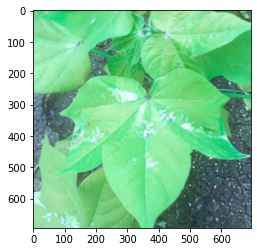

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
#print(a.shape)
#pixels = first_image.reshape((28, 28))
plt.imshow(a, cmap='gray')
plt.show()

In [ ]:
img_size = 224

datagen_train = ImageDataGenerator(horizontal_flip=True,rescale=1./255)

train_generator = datagen_train.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True,rescale=1./255)
validation_generator = datagen_validation.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/val/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
len(train_generator)

61

In [ ]:
train_generator[0][0].shape

(32, 224, 224, 1)

In [ ]:
validation_generator[0][0].shape, validation_generator[0][1]

((18, 224, 224, 1), array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], dtype=float32))

In [ ]:
train_x = train_generator[0][0]
train_y = train_generator[0][1]
valid_x = validation_generator[0][0]
valid_y = validation_generator[0][1]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

(32, 224, 224, 1)
(32, 4)
(18, 224, 224, 1)
(18, 4)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
#Model Building

# Initialising the CNN
model = tf.keras.Sequential()

# 1 - Convolution
model.add(tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(224, 224,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 3rd Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 4th Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Flattening
model.add(tf.keras.layers.Flatten())

# Fully connected layer 1st layer
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(4, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     102528    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

epochs = 20
#steps_per_epoch = train_generator.n//train_generator.batch_size
#validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint, reduce_lr]

history1 = model.fit(
    x=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks
)


Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 0.9194 - accuracy: 0.6791 
Epoch 00001: saving model to model_weights.h5
61/61 [==============================] - 1171s 19s/step - loss: 0.9194 - accuracy: 0.6791 - val_loss: 3.0806 - val_accuracy: 0.2778
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 0.5906 - accuracy: 0.7775
Epoch 00002: saving model to model_weights.h5
61/61 [==============================] - 20s 336ms/step - loss: 0.5906 - accuracy: 0.7775 - val_loss: 4.3338 - val_accuracy: 0.1698
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.4157 - accuracy: 0.8283
Epoch 00003: saving model to model_weights.h5
61/61 [==============================] - 21s 338ms/step - loss: 0.4157 - accuracy: 0.8283 - val_loss: 3.7426 - val_accuracy: 0.2531
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.8913
Epoch 00004: saving model to model_weights.h5
61/61 [==============================] - 20

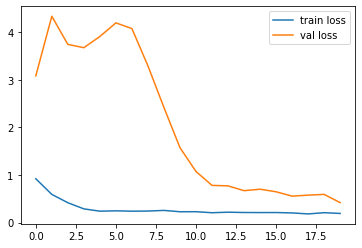

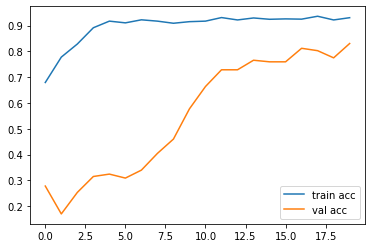

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(validation_generator)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 2, 0, 2, 0, 2, 3, 2,

# InceptionV3

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, Image
import tensorflow as tf

In [ ]:
img_size = 299

datagen_train = ImageDataGenerator(horizontal_flip=True,rescale=1./255)

train_generator = datagen_train.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True,rescale=1./255)
validation_generator = datagen_validation.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/val/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(input_shape=(299, 299, 3), weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
from glob import glob

folders = glob('/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/*')

In [ ]:
# our layers - you can add more if you want
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

x = Flatten()(inception.output)

In [ ]:
from tensorflow.keras.models import Model

prediction = Dense(len(folders), activation='softmax')(x)
#predict = Dense(7, activation='softmax')(prediction)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
61/61 [==============================] - 1161s 19s/step - loss: 3.8205 - accuracy: 0.7827 - val_loss: 1.1286 - val_accuracy: 0.8920
Epoch 2/10
61/61 [==============================] - 21s 339ms/step - loss: 0.9043 - accuracy: 0.9195 - val_loss: 1.4061 - val_accuracy: 0.8920
Epoch 3/10
61/61 [==============================] - 20s 335ms/step - loss: 0.4805 - accuracy: 0.9518 - val_loss: 0.9971 - val_accuracy: 0.9383
Epoch 4/10
61/61 [==============================] - 20s 332ms/step - loss: 0.3986 - accuracy: 0.9651 - val_loss: 1.1830 - val_accuracy: 0.8981
Epoch 5/10
61/61 [==============================] - 20s 332ms/step - loss: 0.3411 - accuracy: 0.9692 - val_loss: 1.5171 - val_accuracy: 0.9136
Epoch 6/10
61/61 [==============================] - 21s 336ms/step - loss: 0.2731 - accuracy: 0.9769 - val_loss: 0.9980 - val_accuracy: 0.9414
Epoch 7/10
61/61 [==============================] - 20s 334ms/step - loss: 0.1922 - accuracy: 0.9826 - val_loss: 0.9286 - val_accuracy: 0.9105

In [ ]:
import matplotlib.pyplot as plt

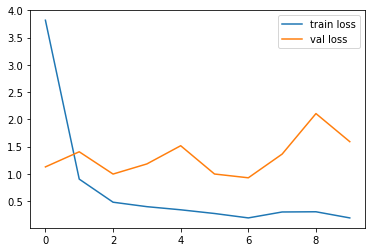

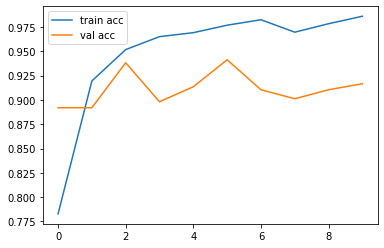

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(validation_generator)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 0, 3, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# **Vgg16**

In [ ]:
img_size = 224

datagen_train = ImageDataGenerator(horizontal_flip=True,rescale=1./255)

train_generator = datagen_train.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True,rescale=1./255)
validation_generator = datagen_validation.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/val/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
from glob import glob

folders = glob('/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/*')

In [ ]:
# our layers - you can add more if you want
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

x = Flatten()(vgg16.output)

In [ ]:
from tensorflow.keras.models import Model

prediction = Dense(len(folders), activation='softmax')(x)
#predict = Dense(7, activation='softmax')(prediction)
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
model1 = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
61/61 [==============================] - 21s 338ms/step - loss: 0.6127 - accuracy: 0.7868 - val_loss: 0.3095 - val_accuracy: 0.8704
Epoch 2/10
61/61 [==============================] - 19s 308ms/step - loss: 0.2139 - accuracy: 0.9221 - val_loss: 0.1858 - val_accuracy: 0.9383
Epoch 3/10
61/61 [==============================] - 19s 308ms/step - loss: 0.1070 - accuracy: 0.9662 - val_loss: 0.1633 - val_accuracy: 0.9321
Epoch 4/10
61/61 [==============================] - 19s 315ms/step - loss: 0.0829 - accuracy: 0.9774 - val_loss: 0.1692 - val_accuracy: 0.9259
Epoch 5/10
61/61 [==============================] - 19s 308ms/step - loss: 0.0547 - accuracy: 0.9928 - val_loss: 0.1623 - val_accuracy: 0.9444
Epoch 6/10
61/61 [==============================] - 19s 305ms/step - loss: 0.0449 - accuracy: 0.9913 - val_loss: 0.1576 - val_accuracy: 0.9414
Epoch 7/10
61/61 [==============================] - 19s 305ms/step - loss: 0.0430 - accuracy: 0.9908 - val_loss: 0.1350 - val_accuracy: 0.9475

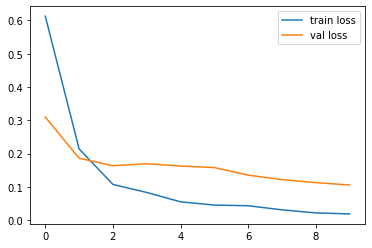

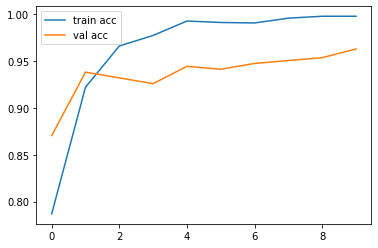

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model1.history['accuracy'], label='train acc')
plt.plot(model1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(validation_generator)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# **Vgg19**

In [ ]:
img_size = 224

datagen_train = ImageDataGenerator(horizontal_flip=True,rescale=1./255)

train_generator = datagen_train.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True,rescale=1./255)
validation_generator = datagen_validation.flow_from_directory("/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/val/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

# useful for getting number of output classes
from glob import glob

folders = glob('/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/*')

# our layers - you can add more if you want
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

x = Flatten()(vgg19.output)

from tensorflow.keras.models import Model

prediction = Dense(len(folders), activation='softmax')(x)
#predict = Dense(7, activation='softmax')(prediction)
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
model2 = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
61/61 [==============================] - 20s 328ms/step - loss: 0.7325 - accuracy: 0.7447 - val_loss: 0.3063 - val_accuracy: 0.8889
Epoch 2/10
61/61 [==============================] - 20s 324ms/step - loss: 0.2291 - accuracy: 0.9195 - val_loss: 0.2535 - val_accuracy: 0.9136
Epoch 3/10
61/61 [==============================] - 20s 322ms/step - loss: 0.1729 - accuracy: 0.9359 - val_loss: 0.2804 - val_accuracy: 0.8765
Epoch 4/10
61/61 [==============================] - 19s 319ms/step - loss: 0.1269 - accuracy: 0.9646 - val_loss: 0.2126 - val_accuracy: 0.9105
Epoch 5/10
61/61 [==============================] - 20s 320ms/step - loss: 0.0936 - accuracy: 0.9774 - val_loss: 0.1940 - val_accuracy: 0.9198
Epoch 6/10
61/61 [==============================] - 20s 324ms/step - loss: 0.0737 - accuracy: 0.9826 - val_loss: 0.1432 - val_accuracy: 0.9506
Epoch 7/10
61/61 [==============================] - 20s 320ms/step - loss: 0.0608 - accuracy: 0.9856 - val_loss: 0.1641 - val_accuracy: 0.9414

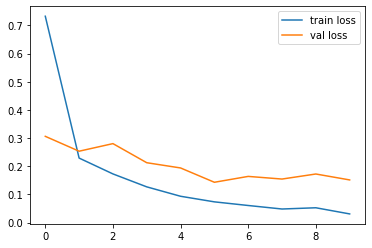

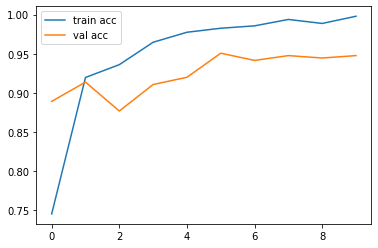

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model2.history['loss'], label='train loss')
plt.plot(model2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model2.history['accuracy'], label='train acc')
plt.plot(model2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(validation_generator)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# **ResNet50**

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

# useful for getting number of output classes
from glob import glob

folders = glob('/content/drive/My Drive/Kaggel Competition/Cotton Disease Prediction/data/train/*')

# our layers - you can add more if you want
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

x = Flatten()(resnet50.output)

from tensorflow.keras.models import Model

prediction = Dense(len(folders), activation='softmax')(x)
#predict = Dense(7, activation='softmax')(prediction)
# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
model3 = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
61/61 [==============================] - 20s 325ms/step - loss: 2.5772 - accuracy: 0.4470 - val_loss: 0.9436 - val_accuracy: 0.6327
Epoch 2/10
61/61 [==============================] - 19s 310ms/step - loss: 0.8579 - accuracy: 0.6504 - val_loss: 0.7499 - val_accuracy: 0.7130
Epoch 3/10
61/61 [==============================] - 19s 318ms/step - loss: 0.8208 - accuracy: 0.6725 - val_loss: 1.1146 - val_accuracy: 0.6173
Epoch 4/10
61/61 [==============================] - 19s 309ms/step - loss: 0.8238 - accuracy: 0.6694 - val_loss: 1.3816 - val_accuracy: 0.5185
Epoch 5/10
61/61 [==============================] - 19s 309ms/step - loss: 0.7059 - accuracy: 0.7084 - val_loss: 0.6158 - val_accuracy: 0.7438
Epoch 6/10
61/61 [==============================] - 19s 307ms/step - loss: 0.7062 - accuracy: 0.7140 - val_loss: 0.7602 - val_accuracy: 0.6790
Epoch 7/10
61/61 [==============================] - 19s 308ms/step - loss: 0.6885 - accuracy: 0.7201 - val_loss: 0.9334 - val_accuracy: 0.6358

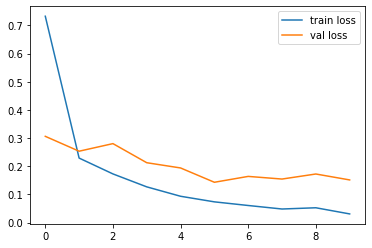

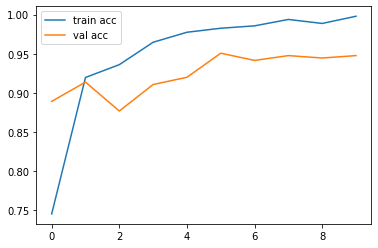

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model2.history['loss'], label='train loss')
plt.plot(model2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model2.history['accuracy'], label='train acc')
plt.plot(model2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(validation_generator)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 3, 0,
       1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 2, 1, 0, 1, 2,
       3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 3, 0, 3, 1, 0, 1, 3, 3, 1, 1, 1, 3,
       3, 1, 3, 0, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3,